#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import warnings;
# warnings.filterwarnings("ignore")

#### Merge data from each month into one CSV

In [2]:
os.listdir("./Sales_Data")

['my_all_months.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
files = [file for file in os.listdir("./Sales_Data") if not file.startswith('.')] # We took 12 csv file easily. To delete hidden files.
all_months_data = pd.DataFrame() # We create null DF. We'll add 12 csv into to this DF.

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data , df])
    
all_months_data.to_csv("my_all_months.csv" , index = False)

#### Read in updated dataframe

In [4]:
df = pd.read_csv("./Sales_Data/my_all_months.csv")
df.head()
df.shape

(186850, 6)

### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

In [5]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
df[df.isna().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


##### Drop rows of NAN

In [7]:
df.dropna(how = 'all' , axis = 0 , inplace = True)

In [8]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

##### Get rid of text in order date column

In [9]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [10]:
df["Order Date"].value_counts()

Order Date        355
12/15/19 20:16      8
10/30/19 21:28      7
12/11/19 13:24      7
04/02/19 13:24      7
                 ... 
01/18/19 18:04      1
01/07/19 19:48      1
01/23/19 17:59      1
01/26/19 10:28      1
09/30/19 00:18      1
Name: Order Date, Length: 142396, dtype: int64

In [11]:
df["Order Date"] == 'Order Date'

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order Date, Length: 186305, dtype: bool

In [12]:
df[df["Order Date"] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
df["Order Date"].apply(lambda x : np.nan if x=="Order Date" else x)

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 186305, dtype: object

In [14]:
df["Order Date"] = df["Order Date"].apply(lambda x : np.nan if x=="Order Date" else x)

In [15]:
df.isna().sum()

Order ID              0
Product               0
Quantity Ordered      0
Price Each            0
Order Date          355
Purchase Address      0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [18]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Make columns correct type

In [19]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [20]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int32") # df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = df["Price Each"].astype("float32")    # df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Order Date"] = df["Order Date"].astype("datetime64") # df["Order Date"] = pd.to_datetime(df["Order Date"])

In [21]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float32
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Augment data with additional columns

#### Add month column

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [23]:
#df["Order Date"][0] # Deneme

In [24]:
#df["Order Date"].dt.month # Deneme

In [25]:
#df.dtypes

In [26]:
df["Month"] = df["Order Date"].dt.month

In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Add month column (alternative method)

In [28]:
#df["Order Date"] = df["Order Date"].astype("object")
#df.dtypes

In [29]:
#df["Order Date"].str.split("-")

#### Add city column

In [30]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [31]:
df["Purchase Address"][0] # Deneme

'917 1st St, Dallas, TX 75001'

In [32]:
df["Purchase Address"][0].split(",") # Deneme

['917 1st St', ' Dallas', ' TX 75001']

In [33]:
df["Purchase Address"][0].split(",")[1] # Deneme

' Dallas'

In [34]:
df["Purchase Address"][0].split(",")[1].strip() # Deneme

'Dallas'

In [35]:
df["City"] = df["Purchase Address"].str.split(",")

In [36]:
df["City"] = df["City"].apply(lambda x : x[1])

In [37]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [38]:
# Lesson 1 Done.

## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [39]:
#df["Price_Total"] = df["Quantity Ordered"] * df["Price Each"]

In [40]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Price_Total
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,99.989998
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.000000
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.990000
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.990000


In [58]:
df.groupby("Month").sum()["Price_Total"]

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Price_Total, dtype: float64

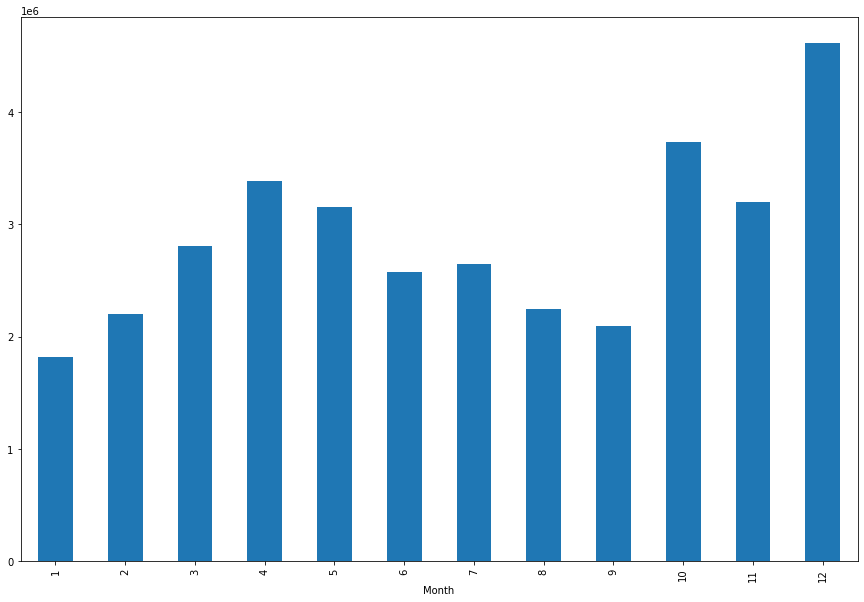

In [61]:
import matplotlib.pyplot as plt

df.groupby("Month").sum()["Price_Total"].plot(kind = "bar" , figsize = (15,10));

In [42]:
#df["Month"].unique()

In [43]:
#df.groupby("Month")

In [44]:
#df.groupby(["Order ID"]).sum()

In [45]:
#df.groupby(["Order ID"]).sum().groupby("Month").mean()

#### Question 2: What city sold the most product?

In [49]:
df.groupby("City").sum()["Price_Total"].sort_values(ascending=False)

City
 San Francisco    8.262204e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Boston           3.661642e+06
 Atlanta          2.795499e+06
 Dallas           2.767975e+06
 Seattle          2.747755e+06
 Portland         2.320491e+06
 Austin           1.819582e+06
Name: Price_Total, dtype: float64

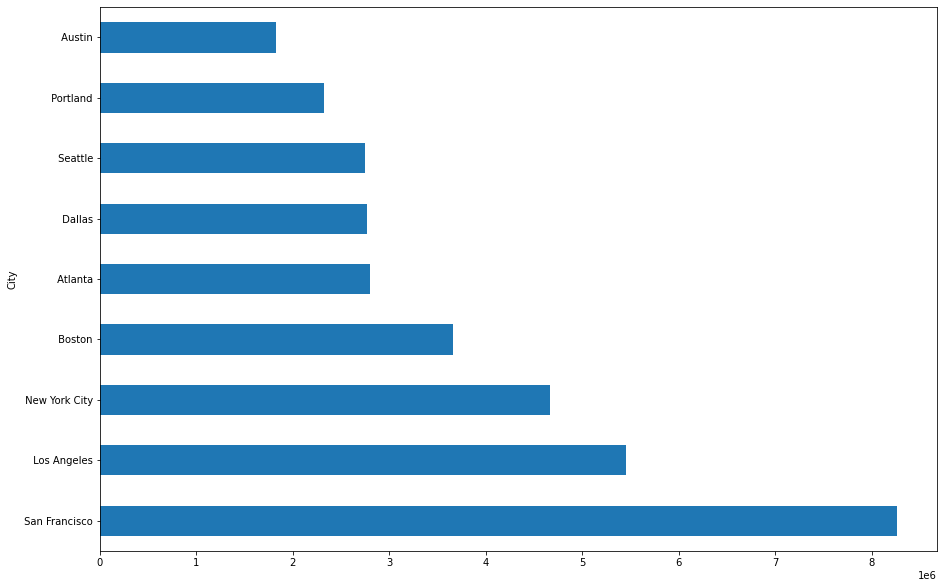

In [64]:
df.groupby("City").sum()["Price_Total"].sort_values(ascending=False).plot(kind = "barh" , figsize = (15,10));

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [52]:
df["Order Date"].dt.hour

0          8
2         22
3         14
4         14
5          9
          ..
186845    20
186846    16
186847     7
186848    17
186849     0
Name: Order Date, Length: 185950, dtype: int64

In [66]:
df.groupby(df["Order Date"].dt.hour).sum()["Price_Total"]

Order Date
0     7.137213e+05
1     4.608669e+05
2     2.348514e+05
3     1.457579e+05
4     1.626610e+05
5     2.306798e+05
6     4.481130e+05
7     7.448541e+05
8     1.192349e+06
9     1.639031e+06
10    1.944287e+06
11    2.300610e+06
12    2.316821e+06
13    2.155390e+06
14    2.083673e+06
15    1.941550e+06
16    1.904601e+06
17    2.129362e+06
18    2.219348e+06
19    2.412939e+06
20    2.281716e+06
21    2.042001e+06
22    1.607549e+06
23    1.179304e+06
Name: Price_Total, dtype: float64

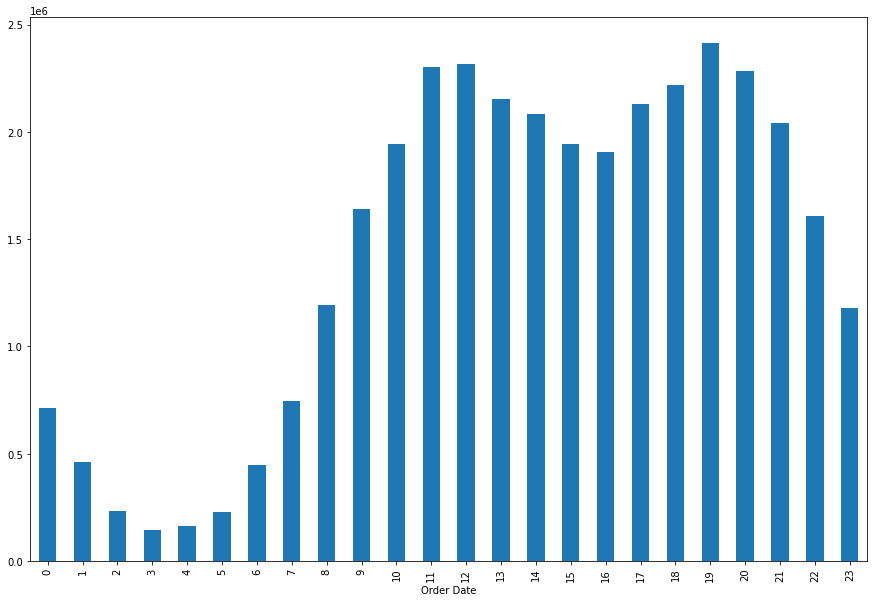

In [68]:
df.groupby(df["Order Date"].dt.hour).sum()["Price_Total"].plot(kind = "bar" , figsize = (15,10));

#### Question 4: What products are most often sold together?

#### What product sold the most? Why do you think it sold the most?

In [ ]:
df.groupby()